# Blackboard for objects

In [1]:
import nbimporter
from teams import Team, Match
from players import Player
from utils import FIFA
from collections import defaultdict
import numpy as np

Importing Jupyter notebook from teams.ipynb
Importing Jupyter notebook from players.ipynb
Importing Jupyter notebook from utils.ipynb


In [2]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)

In [3]:
H = Team('Juventus', data)
A = Team('Genoa', data)

In [4]:
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [5]:
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [6]:
match = Match(H, A, duration=90)

In [7]:
match.kickoff(verbose=True, sleep=0)

min 1: M. Pjanić is in possession
min 1: M. Pjanić fails passing to Alex Sandro
min 2: D. Laxalt is in possession
min 2: D. Laxalt fails passing to G. Pandev
min 3: M. Pjanić is in possession
min 3: SHOOT of M. Pjanić
min 3: M. Perin saves on M. Pjanić
min 4: M. Perin is in possession
min 4: M. Perin fails passing to E. Zukanović
min 5: P. Dybala is in possession
min 5: P. Dybala fails passing to M. Pjanić
min 6: E. Zukanović is in possession
min 6: SHOOT of E. Zukanović
min 6: E. Zukanović shoots out
min 7: G. Buffon is in possession
min 7: G. Buffon passes to A. Barzagli
min 8: A. Barzagli is in possession
min 8: A. Barzagli fails passing to M. Pjanić
min 9: G. Lapadula is in possession
min 9: G. Lapadula fails passing to A. Bertolacci
min 10: A. Barzagli is in possession
min 10: A. Barzagli passes to C. Marchisio
min 11: C. Marchisio is in possession
min 11: C. Marchisio fails passing to G. Higuaín
min 12: D. Laxalt is in possession
min 12: D. Laxalt fails passing to N. Spolli
min 1

In [8]:
print (match.score)
print (["{} ({}')".format(p.name, m) for m, p in match.scorers])

{'Juventus': 3, 'Genoa': 2}
["G. Higuaín (31')", "G. Higuaín (34')", "G. Pandev (42')", "G. Lapadula (65')", "G. Higuaín (72')"]


## Stats

In [9]:
H = Team('Juventus', data)
A = Team('FC Barcelona', data)
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

winners = {H.name: 0, A.name: 0, 'X': 0}
scorers = defaultdict(lambda: 0)
for m in range(100):
    match = Match(H, A, duration=90)
    match.kickoff(verbose=False, sleep=0)
    if match.score[H.name] > match.score[A.name]:
        winners[H.name] += 1
    elif match.score[A.name] > match.score[H.name]:
        winners[A.name] += 1
    else:
        winners['X'] += 1
    for m, p in match.scorers:
        scorers[p.name] += 1

In [10]:
print (winners)

{'Juventus': 36, 'FC Barcelona': 38, 'X': 26}


In [11]:
for k, v in sorted(scorers.items(), key=lambda x: -x[1]):
    print (k, v)

L. Messi 35
L. Suárez 34
G. Higuaín 34
M. Mandžukić 31
O. Dembélé 24
P. Dybala 18
Iniesta 9
M. Pjanić 8
B. Matuidi 7
I. Rakitić 6
Sergio Busquets 6
C. Marchisio 6
A. Barzagli 4
Alex Sandro 4
M. Benatia 4
S. Umtiti 3
Jordi Alba 3
Nélson Semedo 2
G. Chiellini 1
Piqué 1


# Visualization

In [8]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)
H = Team('Juventus', data)
A = Team('Napoli', data)
H.selection(module={Player.DEF: 4, Player.MID: 4, Player.ATT: 2})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [9]:
match = Match(H, A, duration=90)

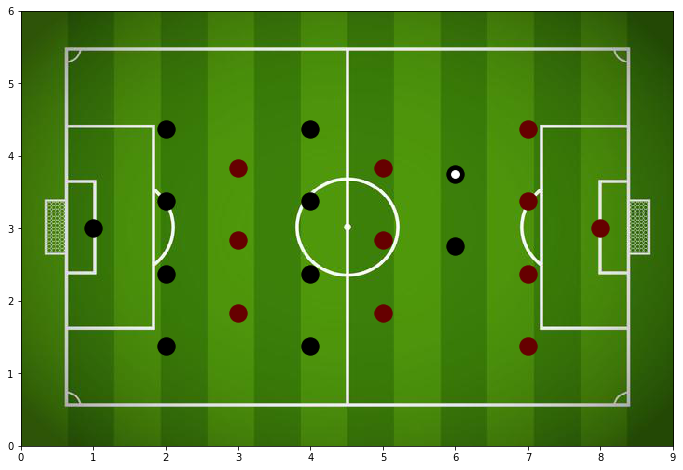

min 90: P. Dybala is in possession
min 90: SHOOT of P. Dybala
min 90: José Reina saves on P. Dybala


In [10]:
match.kickoff(show=True, sleep=2, verbose=True)

In [11]:
print (match.score)

{'Juventus': 1, 'Napoli': 1}


In [12]:
print (match.scorers)

[(2, Alex Sandro, 1, A: 0.675, D: 0.82, P: 0.76), (63, D. Mertens, 3, A: 0.825, D: 0.36666666666666664, P: 0.775)]
